## Student Performance Indicator

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [6]:
df=pd.read_csv('data/data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [7]:
X = df.drop(columns=['math_score'],axis=1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
print("Categories in gender :     ",end=" " )
print(df['gender'].unique())

print("Categories in race_ethnicity :  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental level of education :",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in lunch :     ",end=" " )
print(df['lunch'].unique())

print("Categories in test preparation course:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in gender :      ['female' 'male']
Categories in race_ethnicity :   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch :      ['standard' 'free/reduced']
Categories in test preparation course:      ['none' 'completed']


In [10]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [11]:
numerical_features=X.select_dtypes(exclude='object').columns
categorical_features=X.select_dtypes(include='object').columns

numeric_transform=StandardScaler()
OneHot_transform=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',OneHot_transform,categorical_features),
        ('StandardScaler',numeric_transform,numerical_features)
        
    ]
)

In [12]:
X=preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape , X_test.shape

((700, 19), (300, 19))

#### Create an Evaluate Function to give all metrics after model Training


In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) #Train Model
    
    # Make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2484
- Mean Absolute Error: 4.1978
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5602
- Mean Absolute Error: 4.4210
- R2 Score: 0.8757


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759




K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6787
- Mean Absolute Error: 4.5063
- R2 Score: 0.8538
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.5263
- Mean Absolute Error: 5.8373
- R2 Score: 0.7723


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2988
- Mean Absolute Error: 0.0214
- R2 Score: 0.9996
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.0060
- Mean Absolute Error: 6.3967
- R2 Score: 0.7424


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3069
- Mean Absolute Error: 1.8278
- R2 Score: 0.9759
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.1623
- Mean Absolute Error: 4.8663
- R2 Score: 0.8474


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.8957
- Mean Absolute Error: 0.5657
- R2 Score: 0.9964
--

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.875907
0,Linear Regression,0.875745
7,CatBoosting Regressor,0.852108
5,Random Forest Regressor,0.847376
8,AdaBoost Regressor,0.836573
6,XGBRegressor,0.811816
1,Lasso,0.810281
3,K-Neighbors Regressor,0.772333
4,Decision Tree,0.742388


## Linear Regression

In [18]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.57


### Plot of y test & pred

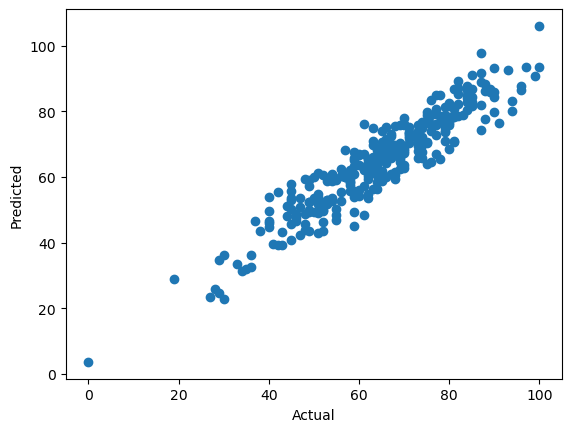

In [19]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

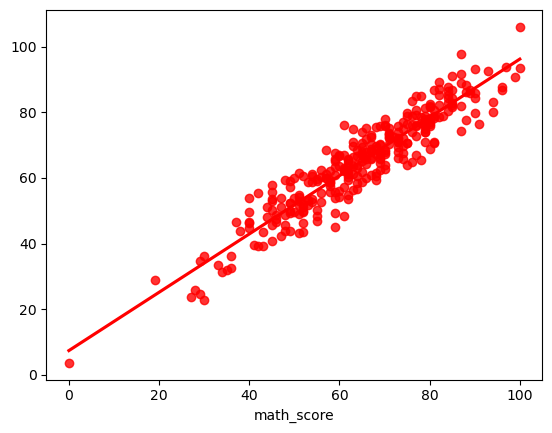

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


#### Difference between Actual and Predicted Values

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.492188,14.507812
737,53,58.851562,-5.851562
740,80,76.976562,3.023438
660,74,76.921875,-2.921875
411,84,87.660156,-3.660156
...,...,...,...
468,77,72.886719,4.113281
935,70,62.621094,7.378906
428,65,58.671875,6.328125
7,40,44.777344,-4.777344
